### Data processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv('D:\ML\Project\data\consumption.csv')
weather_avg = pd.read_csv('D:\ML\Project\data\weather-avg.csv')
weather_min = pd.read_csv('D:\ML\Project\data\weather-min.csv')
weather_max = pd.read_csv('D:\ML\Project\data\weather-max.csv')
info = pd.read_csv('D:\ML\Project\data\info.csv')

In [4]:
df = pd.read_csv("data/consumption.csv")
weather_avg = pd.read_csv('data/weather-avg.csv')
weather_min = pd.read_csv('data/weather-min.csv')
weather_max = pd.read_csv('data/weather-max.csv')
info = pd.read_csv('data/info.csv')


In [2]:
import pandas as pd
weather_avg = pd.read_csv('data/weather-avg.csv')

In [3]:
weather_avg.isna().sum()

meter_id                0
2017-01-01 00:00:00     1
2017-01-02 00:00:00     0
2017-01-03 00:00:00     0
2017-01-04 00:00:00     0
                       ..
2017-12-27 00:00:00    67
2017-12-28 00:00:00    67
2017-12-29 00:00:00    67
2017-12-30 00:00:00    67
2017-12-31 00:00:00    67
Length: 366, dtype: int64

In [5]:
# 1- Setting an index 
weather_avg = weather_avg.set_index("meter_id")
weather_min = weather_min.set_index("meter_id")
weather_max = weather_max.set_index("meter_id")
info = info.set_index("meter_id")

# 2- Reindexing to the df.iloc[:,0] which is the first column of df which is "meter_id" of df
weather_avg_sorted = weather_avg.reindex(df.iloc[:,0])
weather_min_sorted = weather_min.reindex(df.iloc[:,0])
weather_max_sorted = weather_max.reindex(df.iloc[:,0])
info_sorted = info.reindex(df.iloc[:,0])

# Setting an index for df
df = df.set_index("meter_id")  


In [6]:
df

,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,2017-01-01 04:30:00,...,2017-12-31 19:00:00,2017-12-31 19:30:00,2017-12-31 20:00:00,2017-12-31 20:30:00,2017-12-31 21:00:00,2017-12-31 21:30:00,2017-12-31 22:00:00,2017-12-31 22:30:00,2017-12-31 23:00:00,2017-12-31 23:30:00
meter_id,,,,,,,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.052,0.091,0.083,0.082,0.090,0.074,0.092,0.076,0.055,0.036
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.402,0.639,0.537,0.834,0.868,0.394,0.073,0.077,0.049,0.048
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.110,0.123,0.012,0.034,0.006,0.027,0.001,0.044,0.004,0.035
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.118,0.096,0.135,0.041,0.018,0.057,0.018,0.038,0.040,0.014
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022,0.010,0.036,0.006,0.024,0.014,0.028,0.006,0.024,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,0.011,1.089,0.014,0.204,0.015,0.159,0.014,0.013,0.174,0.013,...,0.176,0.200,0.184,0.177,0.182,0.201,0.181,0.181,0.177,0.198
0xfdaf9f857621ec06f2cf801f42a020a322835090,0.015,1.523,0.105,0.296,0.067,0.171,0.025,0.260,0.013,0.024,...,0.022,0.009,0.028,0.020,0.010,0.009,0.008,0.033,0.015,0.013
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,0.222,0.276,0.097,0.058,0.045,0.045,0.038,0.034,0.043,0.044,...,0.144,0.169,0.145,0.200,0.170,0.127,0.135,0.200,0.118,0.106


In [7]:
weather_avg_sorted

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-12-22 00:00:00,2017-12-23 00:00:00,2017-12-24 00:00:00,2017-12-25 00:00:00,2017-12-26 00:00:00,2017-12-27 00:00:00,2017-12-28 00:00:00,2017-12-29 00:00:00,2017-12-30 00:00:00,2017-12-31 00:00:00
meter_id,,,,,,,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,4.904167,1.275000,2.225000,4.266667,0.262500,1.570833,7.833333,8.391667,6.904167,6.079167,...,8.666667,8.370833,8.662500,9.645833,4.008333,1.491667,0.562500,2.925000,9.383333,9.462500
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,5.283333,1.816667,2.304167,4.387500,1.708333,3.304167,6.879167,7.508333,7.070833,5.862500,...,8.862500,8.400000,8.670833,8.929167,5.079167,3.220833,1.012500,3.600000,9.229167,9.733333
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,7.125000,3.875000,3.250000,5.750000,2.958333,4.000000,8.958333,9.583333,9.083333,7.375000,...,10.958333,9.875000,10.041667,10.666667,6.583333,4.541667,3.041667,5.791667,11.625000,11.666667
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,7.125000,3.875000,3.250000,5.750000,2.958333,4.000000,8.958333,9.583333,9.083333,7.375000,...,10.958333,9.875000,10.041667,10.666667,6.583333,4.541667,3.041667,5.791667,11.625000,11.666667
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,4.416667,0.850000,1.354167,3.420833,0.762500,1.958333,8.025000,7.700000,6.279167,5.337500,...,9.012500,7.558333,7.795833,8.358333,3.904167,1.354167,0.650000,3.362500,9.170833,9.108333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,4.554167,0.687500,3.208333,4.554167,0.654167,2.937500,6.566667,7.491667,6.620833,6.412500,...,8.179167,7.308333,9.079167,9.558333,3.483333,1.487500,0.016667,1.187500,6.012500,8.387500
0xfdaf9f857621ec06f2cf801f42a020a322835090,5.270833,1.858333,2.175000,4.275000,1.629167,2.808333,6.775000,7.345833,7.100000,5.708333,...,8.454167,8.387500,8.704167,9.258333,4.637500,3.295833,0.741667,2.779167,8.729167,9.454167
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,5.133333,1.175000,2.431250,4.220833,-1.200000,2.152083,8.387500,8.116667,7.254167,6.131250,...,9.539583,8.437500,8.831818,9.658333,4.447826,1.958333,0.858333,3.934783,9.797917,9.852083


In [8]:
# Filling the mean value for the NaN values in num_bedrooms column:
brinfo=info_sorted['num_bedrooms']
values = {'num_bedrooms' : brinfo.mean()}
info_filled_br = info_sorted.fillna(value = values)
brinfo_filled = info_filled_br['num_bedrooms']

In [9]:
brinfo_filled

meter_id
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7    2.000000
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da    3.112426
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f    3.112426
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407    3.112426
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f    3.112426
                                                ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065    3.112426
0xfdaf9f857621ec06f2cf801f42a020a322835090    3.112426
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18    3.112426
0x47218b46abb2fcaade487a211911406dc6e13730    3.112426
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd    3.112426
Name: num_bedrooms, Length: 3248, dtype: float64

In [10]:
from datetime import datetime

In [11]:
df_T = df.T
df_T.index = pd.to_datetime(df_T.index)
#resampling the data into daily usage:
df_T_daily = df_T.resample('D').sum()
#df_T_monthly = df_T.resample('M').sum()
#df_monthly = df_T_monthly.T
df_daily = df_T_daily.T

In [44]:
df_T_daily

meter_id,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,0x263b7a6969c175823ea1fba2983668fa5f640ab4,0xc8ef570cfdbc48c0555ba48ccb350403cf43cd79,0x077eb7207315025bfd8dd65f5b81f8be612b3229,0xaf8627889fff7ba6fa91bfae6b05636453d032f1,0x3b7466451863d09c34673c4dfe45391d56e0cb23,...,0x5338e0440f7dbcc50f20487fd7a3a675b7508112,0xaec5c63f4e44e21559b0404488ef3ba9884b2745,0xdf6a54b92985398af03423426e744c6d40ee8c69,0x6b6ddc9a73405caab50c8d5575b72288aaa7e844,0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,0xfdaf9f857621ec06f2cf801f42a020a322835090,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,0x47218b46abb2fcaade487a211911406dc6e13730,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd
2017-01-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,33.068,15.035,33.071,3.158,8.166,2.317,14.437,7.824,23.965,11.302
2017-01-02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,36.394,14.989,28.413,3.145,13.519,2.301,16.274,7.517,28.689,14.178
2017-01-03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,33.173,17.267,34.198,3.152,6.778,2.352,7.031,5.398,27.664,15.499
2017-01-04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,33.808,17.712,34.620,3.151,7.476,2.516,17.018,6.788,29.229,11.853
2017-01-05,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,37.332,17.784,37.395,3.180,9.878,2.229,17.603,7.360,29.548,17.431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-12-28,4.503,24.618,17.705,23.993,25.871,17.173,0.427,27.661,8.669,2.781,...,27.911,14.741,19.128,48.016,15.310,10.032,12.906,5.455,31.912,21.011
2017-12-29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-12-30,5.129,15.167,8.966,15.841,46.274,23.460,4.071,10.422,5.830,6.430,...,25.223,16.106,18.483,44.550,12.441,9.757,3.122,5.679,26.313,17.397


In [12]:
brinfo

meter_id
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7    2.0
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da    NaN
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f    NaN
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407    NaN
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f    NaN
                                             ... 
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065    NaN
0xfdaf9f857621ec06f2cf801f42a020a322835090    NaN
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18    NaN
0x47218b46abb2fcaade487a211911406dc6e13730    NaN
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd    NaN
Name: num_bedrooms, Length: 3248, dtype: float64

In [13]:
df_daily

,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,...,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31
meter_id,,,,,,,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,4.030,5.397,0.0,4.818,3.931,0.0,4.503,0.0,5.129,5.395
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,13.101,14.327,0.0,14.936,16.174,0.0,24.618,0.0,15.167,11.751
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,10.201,7.320,0.0,7.384,14.425,0.0,17.705,0.0,8.966,4.633
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,14.833,12.477,0.0,10.974,19.646,0.0,23.993,0.0,15.841,14.452
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,39.440,35.538,0.0,8.351,9.957,0.0,25.871,0.0,46.274,16.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,2.317,2.301,2.352,2.516,2.229,2.354,2.397,2.397,2.269,0.0,...,9.390,9.231,0.0,9.216,9.336,0.0,10.032,0.0,9.757,9.480
0xfdaf9f857621ec06f2cf801f42a020a322835090,14.437,16.274,7.031,17.018,17.603,15.005,8.987,8.490,10.136,0.0,...,4.141,2.828,0.0,4.818,3.357,0.0,12.906,0.0,3.122,3.401
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,7.824,7.517,5.398,6.788,7.360,6.898,7.321,8.042,8.207,0.0,...,6.767,5.919,0.0,6.077,7.761,0.0,5.455,0.0,5.679,8.148


In [14]:
df_daily.iloc[0]

2017-01-01    0.000
2017-01-02    0.000
2017-01-03    0.000
2017-01-04    0.000
2017-01-05    0.000
              ...  
2017-12-27    0.000
2017-12-28    4.503
2017-12-29    0.000
2017-12-30    5.129
2017-12-31    5.395
Freq: D, Name: 0xa62b9f23553ff183f61e2bf943aab3d5983d02d7, Length: 365, dtype: float64

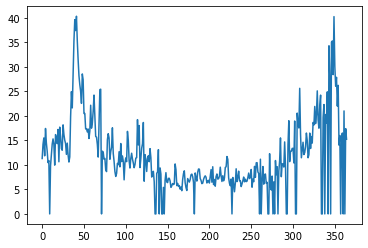

In [15]:
df_daily_last_user = []
for i in df_daily.loc["0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd"]:
    df_daily_last_user.append(i)

plt.plot(df_daily_last_user)

In [16]:
df_daily.iloc[0][0]

0.0

In [17]:
df_daily.iloc[0][0] != 0

False

In [18]:
info_sorted

,dwelling_type,num_occupants,num_bedrooms,heating_fuel,hot_water_fuel,boiler_age,loft_insulation,wall_insulation,heating_temperature,efficient_lighting_percentage,...,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
meter_id,,,,,,,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,terraced_house,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xfdaf9f857621ec06f2cf801f42a020a322835090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,terraced_house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
temps=[]
temps_min=[]
temps_max=[]
En_con=[]
l_En_con=[]
day_arr=[]
br_arr=[]
dwelling_type_bungalow=[]
dwelling_type_detached_house=[]
dwelling_type_flat=[]
dwelling_type_semi_detached_house=[]
dwelling_type_terraced_house=[]
dew_type = pd.get_dummies(info_sorted.dwelling_type, prefix='dwelling_type')

for i in range(df_daily.shape[0]): # loop over all users
    
    print ("user ", i+1,  " data sorting is progressing out of 3248 users")
    
    for j in range(1, 365): #loop over days, skip first day for each user :( 
        
        if df_daily.iloc[i][j] != 0 and df_daily.iloc[i][j-1] != 0 :  #if the value == 0, it means NaN, so skip it.
            En_con.append(df_daily.iloc[i][j])
            l_En_con.append(df_daily.iloc[i][j-1])
            temps.append(weather_avg_sorted.iloc[i][j]) #weather_avg_sorted is daily, nicely sorted!
            temps_min.append(weather_min_sorted.iloc[i][j])
            temps_max.append(weather_max_sorted.iloc[i][j])
            day_arr.append(j)
            br_arr.append(brinfo_filled[i])
            dwelling_type_bungalow.append(dew_type.iloc[i, 0])
            dwelling_type_detached_house.append(dew_type.iloc[i, 1])
            dwelling_type_flat.append(dew_type.iloc[i, 2])
            dwelling_type_semi_detached_house.append(dew_type.iloc[i, 3])
            dwelling_type_terraced_house.append(dew_type.iloc[i, 4])         
            

user  1  data sorting is progressing out of 3248 users
user  2  data sorting is progressing out of 3248 users
user  3  data sorting is progressing out of 3248 users
user  4  data sorting is progressing out of 3248 users
user  5  data sorting is progressing out of 3248 users
user  6  data sorting is progressing out of 3248 users
user  7  data sorting is progressing out of 3248 users
user  8  data sorting is progressing out of 3248 users
user  9  data sorting is progressing out of 3248 users
user  10  data sorting is progressing out of 3248 users
user  11  data sorting is progressing out of 3248 users
user  12  data sorting is progressing out of 3248 users
user  13  data sorting is progressing out of 3248 users
user  14  data sorting is progressing out of 3248 users
user  15  data sorting is progressing out of 3248 users
user  16  data sorting is progressing out of 3248 users
user  17  data sorting is progressing out of 3248 users
user  18  data sorting is progressing out of 3248 users
u

user  148  data sorting is progressing out of 3248 users
user  149  data sorting is progressing out of 3248 users
user  150  data sorting is progressing out of 3248 users
user  151  data sorting is progressing out of 3248 users
user  152  data sorting is progressing out of 3248 users
user  153  data sorting is progressing out of 3248 users
user  154  data sorting is progressing out of 3248 users
user  155  data sorting is progressing out of 3248 users
user  156  data sorting is progressing out of 3248 users
user  157  data sorting is progressing out of 3248 users
user  158  data sorting is progressing out of 3248 users
user  159  data sorting is progressing out of 3248 users
user  160  data sorting is progressing out of 3248 users
user  161  data sorting is progressing out of 3248 users
user  162  data sorting is progressing out of 3248 users
user  163  data sorting is progressing out of 3248 users
user  164  data sorting is progressing out of 3248 users
user  165  data sorting is prog

user  293  data sorting is progressing out of 3248 users
user  294  data sorting is progressing out of 3248 users
user  295  data sorting is progressing out of 3248 users
user  296  data sorting is progressing out of 3248 users
user  297  data sorting is progressing out of 3248 users
user  298  data sorting is progressing out of 3248 users
user  299  data sorting is progressing out of 3248 users
user  300  data sorting is progressing out of 3248 users
user  301  data sorting is progressing out of 3248 users
user  302  data sorting is progressing out of 3248 users
user  303  data sorting is progressing out of 3248 users
user  304  data sorting is progressing out of 3248 users
user  305  data sorting is progressing out of 3248 users
user  306  data sorting is progressing out of 3248 users
user  307  data sorting is progressing out of 3248 users
user  308  data sorting is progressing out of 3248 users
user  309  data sorting is progressing out of 3248 users
user  310  data sorting is prog

user  438  data sorting is progressing out of 3248 users
user  439  data sorting is progressing out of 3248 users
user  440  data sorting is progressing out of 3248 users
user  441  data sorting is progressing out of 3248 users
user  442  data sorting is progressing out of 3248 users
user  443  data sorting is progressing out of 3248 users
user  444  data sorting is progressing out of 3248 users
user  445  data sorting is progressing out of 3248 users
user  446  data sorting is progressing out of 3248 users
user  447  data sorting is progressing out of 3248 users
user  448  data sorting is progressing out of 3248 users
user  449  data sorting is progressing out of 3248 users
user  450  data sorting is progressing out of 3248 users
user  451  data sorting is progressing out of 3248 users
user  452  data sorting is progressing out of 3248 users
user  453  data sorting is progressing out of 3248 users
user  454  data sorting is progressing out of 3248 users
user  455  data sorting is prog

user  582  data sorting is progressing out of 3248 users
user  583  data sorting is progressing out of 3248 users
user  584  data sorting is progressing out of 3248 users
user  585  data sorting is progressing out of 3248 users
user  586  data sorting is progressing out of 3248 users
user  587  data sorting is progressing out of 3248 users
user  588  data sorting is progressing out of 3248 users
user  589  data sorting is progressing out of 3248 users
user  590  data sorting is progressing out of 3248 users
user  591  data sorting is progressing out of 3248 users
user  592  data sorting is progressing out of 3248 users
user  593  data sorting is progressing out of 3248 users
user  594  data sorting is progressing out of 3248 users
user  595  data sorting is progressing out of 3248 users
user  596  data sorting is progressing out of 3248 users
user  597  data sorting is progressing out of 3248 users
user  598  data sorting is progressing out of 3248 users
user  599  data sorting is prog

user  726  data sorting is progressing out of 3248 users
user  727  data sorting is progressing out of 3248 users
user  728  data sorting is progressing out of 3248 users
user  729  data sorting is progressing out of 3248 users
user  730  data sorting is progressing out of 3248 users
user  731  data sorting is progressing out of 3248 users
user  732  data sorting is progressing out of 3248 users
user  733  data sorting is progressing out of 3248 users
user  734  data sorting is progressing out of 3248 users
user  735  data sorting is progressing out of 3248 users
user  736  data sorting is progressing out of 3248 users
user  737  data sorting is progressing out of 3248 users
user  738  data sorting is progressing out of 3248 users
user  739  data sorting is progressing out of 3248 users
user  740  data sorting is progressing out of 3248 users
user  741  data sorting is progressing out of 3248 users
user  742  data sorting is progressing out of 3248 users
user  743  data sorting is prog

user  871  data sorting is progressing out of 3248 users
user  872  data sorting is progressing out of 3248 users
user  873  data sorting is progressing out of 3248 users
user  874  data sorting is progressing out of 3248 users
user  875  data sorting is progressing out of 3248 users
user  876  data sorting is progressing out of 3248 users
user  877  data sorting is progressing out of 3248 users
user  878  data sorting is progressing out of 3248 users
user  879  data sorting is progressing out of 3248 users
user  880  data sorting is progressing out of 3248 users
user  881  data sorting is progressing out of 3248 users
user  882  data sorting is progressing out of 3248 users
user  883  data sorting is progressing out of 3248 users
user  884  data sorting is progressing out of 3248 users
user  885  data sorting is progressing out of 3248 users
user  886  data sorting is progressing out of 3248 users
user  887  data sorting is progressing out of 3248 users
user  888  data sorting is prog

user  1016  data sorting is progressing out of 3248 users
user  1017  data sorting is progressing out of 3248 users
user  1018  data sorting is progressing out of 3248 users
user  1019  data sorting is progressing out of 3248 users
user  1020  data sorting is progressing out of 3248 users
user  1021  data sorting is progressing out of 3248 users
user  1022  data sorting is progressing out of 3248 users
user  1023  data sorting is progressing out of 3248 users
user  1024  data sorting is progressing out of 3248 users
user  1025  data sorting is progressing out of 3248 users
user  1026  data sorting is progressing out of 3248 users
user  1027  data sorting is progressing out of 3248 users
user  1028  data sorting is progressing out of 3248 users
user  1029  data sorting is progressing out of 3248 users
user  1030  data sorting is progressing out of 3248 users
user  1031  data sorting is progressing out of 3248 users
user  1032  data sorting is progressing out of 3248 users
user  1033  da

user  1158  data sorting is progressing out of 3248 users
user  1159  data sorting is progressing out of 3248 users
user  1160  data sorting is progressing out of 3248 users
user  1161  data sorting is progressing out of 3248 users
user  1162  data sorting is progressing out of 3248 users
user  1163  data sorting is progressing out of 3248 users
user  1164  data sorting is progressing out of 3248 users
user  1165  data sorting is progressing out of 3248 users
user  1166  data sorting is progressing out of 3248 users
user  1167  data sorting is progressing out of 3248 users
user  1168  data sorting is progressing out of 3248 users
user  1169  data sorting is progressing out of 3248 users
user  1170  data sorting is progressing out of 3248 users
user  1171  data sorting is progressing out of 3248 users
user  1172  data sorting is progressing out of 3248 users
user  1173  data sorting is progressing out of 3248 users
user  1174  data sorting is progressing out of 3248 users
user  1175  da

user  1301  data sorting is progressing out of 3248 users
user  1302  data sorting is progressing out of 3248 users
user  1303  data sorting is progressing out of 3248 users
user  1304  data sorting is progressing out of 3248 users
user  1305  data sorting is progressing out of 3248 users
user  1306  data sorting is progressing out of 3248 users
user  1307  data sorting is progressing out of 3248 users
user  1308  data sorting is progressing out of 3248 users
user  1309  data sorting is progressing out of 3248 users
user  1310  data sorting is progressing out of 3248 users
user  1311  data sorting is progressing out of 3248 users
user  1312  data sorting is progressing out of 3248 users
user  1313  data sorting is progressing out of 3248 users
user  1314  data sorting is progressing out of 3248 users
user  1315  data sorting is progressing out of 3248 users
user  1316  data sorting is progressing out of 3248 users
user  1317  data sorting is progressing out of 3248 users
user  1318  da

user  1443  data sorting is progressing out of 3248 users
user  1444  data sorting is progressing out of 3248 users
user  1445  data sorting is progressing out of 3248 users
user  1446  data sorting is progressing out of 3248 users
user  1447  data sorting is progressing out of 3248 users
user  1448  data sorting is progressing out of 3248 users
user  1449  data sorting is progressing out of 3248 users
user  1450  data sorting is progressing out of 3248 users
user  1451  data sorting is progressing out of 3248 users
user  1452  data sorting is progressing out of 3248 users
user  1453  data sorting is progressing out of 3248 users
user  1454  data sorting is progressing out of 3248 users
user  1455  data sorting is progressing out of 3248 users
user  1456  data sorting is progressing out of 3248 users
user  1457  data sorting is progressing out of 3248 users
user  1458  data sorting is progressing out of 3248 users
user  1459  data sorting is progressing out of 3248 users
user  1460  da

user  1585  data sorting is progressing out of 3248 users
user  1586  data sorting is progressing out of 3248 users
user  1587  data sorting is progressing out of 3248 users
user  1588  data sorting is progressing out of 3248 users
user  1589  data sorting is progressing out of 3248 users
user  1590  data sorting is progressing out of 3248 users
user  1591  data sorting is progressing out of 3248 users
user  1592  data sorting is progressing out of 3248 users
user  1593  data sorting is progressing out of 3248 users
user  1594  data sorting is progressing out of 3248 users
user  1595  data sorting is progressing out of 3248 users
user  1596  data sorting is progressing out of 3248 users
user  1597  data sorting is progressing out of 3248 users
user  1598  data sorting is progressing out of 3248 users
user  1599  data sorting is progressing out of 3248 users
user  1600  data sorting is progressing out of 3248 users
user  1601  data sorting is progressing out of 3248 users
user  1602  da

user  1728  data sorting is progressing out of 3248 users
user  1729  data sorting is progressing out of 3248 users
user  1730  data sorting is progressing out of 3248 users
user  1731  data sorting is progressing out of 3248 users
user  1732  data sorting is progressing out of 3248 users
user  1733  data sorting is progressing out of 3248 users
user  1734  data sorting is progressing out of 3248 users
user  1735  data sorting is progressing out of 3248 users
user  1736  data sorting is progressing out of 3248 users
user  1737  data sorting is progressing out of 3248 users
user  1738  data sorting is progressing out of 3248 users
user  1739  data sorting is progressing out of 3248 users
user  1740  data sorting is progressing out of 3248 users
user  1741  data sorting is progressing out of 3248 users
user  1742  data sorting is progressing out of 3248 users
user  1743  data sorting is progressing out of 3248 users
user  1744  data sorting is progressing out of 3248 users
user  1745  da

user  1870  data sorting is progressing out of 3248 users
user  1871  data sorting is progressing out of 3248 users
user  1872  data sorting is progressing out of 3248 users
user  1873  data sorting is progressing out of 3248 users
user  1874  data sorting is progressing out of 3248 users
user  1875  data sorting is progressing out of 3248 users
user  1876  data sorting is progressing out of 3248 users
user  1877  data sorting is progressing out of 3248 users
user  1878  data sorting is progressing out of 3248 users
user  1879  data sorting is progressing out of 3248 users
user  1880  data sorting is progressing out of 3248 users
user  1881  data sorting is progressing out of 3248 users
user  1882  data sorting is progressing out of 3248 users
user  1883  data sorting is progressing out of 3248 users
user  1884  data sorting is progressing out of 3248 users
user  1885  data sorting is progressing out of 3248 users
user  1886  data sorting is progressing out of 3248 users
user  1887  da

user  2012  data sorting is progressing out of 3248 users
user  2013  data sorting is progressing out of 3248 users
user  2014  data sorting is progressing out of 3248 users
user  2015  data sorting is progressing out of 3248 users
user  2016  data sorting is progressing out of 3248 users
user  2017  data sorting is progressing out of 3248 users
user  2018  data sorting is progressing out of 3248 users
user  2019  data sorting is progressing out of 3248 users
user  2020  data sorting is progressing out of 3248 users
user  2021  data sorting is progressing out of 3248 users
user  2022  data sorting is progressing out of 3248 users
user  2023  data sorting is progressing out of 3248 users
user  2024  data sorting is progressing out of 3248 users
user  2025  data sorting is progressing out of 3248 users
user  2026  data sorting is progressing out of 3248 users
user  2027  data sorting is progressing out of 3248 users
user  2028  data sorting is progressing out of 3248 users
user  2029  da

user  2154  data sorting is progressing out of 3248 users
user  2155  data sorting is progressing out of 3248 users
user  2156  data sorting is progressing out of 3248 users
user  2157  data sorting is progressing out of 3248 users
user  2158  data sorting is progressing out of 3248 users
user  2159  data sorting is progressing out of 3248 users
user  2160  data sorting is progressing out of 3248 users
user  2161  data sorting is progressing out of 3248 users
user  2162  data sorting is progressing out of 3248 users
user  2163  data sorting is progressing out of 3248 users
user  2164  data sorting is progressing out of 3248 users
user  2165  data sorting is progressing out of 3248 users
user  2166  data sorting is progressing out of 3248 users
user  2167  data sorting is progressing out of 3248 users
user  2168  data sorting is progressing out of 3248 users
user  2169  data sorting is progressing out of 3248 users
user  2170  data sorting is progressing out of 3248 users
user  2171  da

user  2296  data sorting is progressing out of 3248 users
user  2297  data sorting is progressing out of 3248 users
user  2298  data sorting is progressing out of 3248 users
user  2299  data sorting is progressing out of 3248 users
user  2300  data sorting is progressing out of 3248 users
user  2301  data sorting is progressing out of 3248 users
user  2302  data sorting is progressing out of 3248 users
user  2303  data sorting is progressing out of 3248 users
user  2304  data sorting is progressing out of 3248 users
user  2305  data sorting is progressing out of 3248 users
user  2306  data sorting is progressing out of 3248 users
user  2307  data sorting is progressing out of 3248 users
user  2308  data sorting is progressing out of 3248 users
user  2309  data sorting is progressing out of 3248 users
user  2310  data sorting is progressing out of 3248 users
user  2311  data sorting is progressing out of 3248 users
user  2312  data sorting is progressing out of 3248 users
user  2313  da

user  2438  data sorting is progressing out of 3248 users
user  2439  data sorting is progressing out of 3248 users
user  2440  data sorting is progressing out of 3248 users
user  2441  data sorting is progressing out of 3248 users
user  2442  data sorting is progressing out of 3248 users
user  2443  data sorting is progressing out of 3248 users
user  2444  data sorting is progressing out of 3248 users
user  2445  data sorting is progressing out of 3248 users
user  2446  data sorting is progressing out of 3248 users
user  2447  data sorting is progressing out of 3248 users
user  2448  data sorting is progressing out of 3248 users
user  2449  data sorting is progressing out of 3248 users
user  2450  data sorting is progressing out of 3248 users
user  2451  data sorting is progressing out of 3248 users
user  2452  data sorting is progressing out of 3248 users
user  2453  data sorting is progressing out of 3248 users
user  2454  data sorting is progressing out of 3248 users
user  2455  da

user  2580  data sorting is progressing out of 3248 users
user  2581  data sorting is progressing out of 3248 users
user  2582  data sorting is progressing out of 3248 users
user  2583  data sorting is progressing out of 3248 users
user  2584  data sorting is progressing out of 3248 users
user  2585  data sorting is progressing out of 3248 users
user  2586  data sorting is progressing out of 3248 users
user  2587  data sorting is progressing out of 3248 users
user  2588  data sorting is progressing out of 3248 users
user  2589  data sorting is progressing out of 3248 users
user  2590  data sorting is progressing out of 3248 users
user  2591  data sorting is progressing out of 3248 users
user  2592  data sorting is progressing out of 3248 users
user  2593  data sorting is progressing out of 3248 users
user  2594  data sorting is progressing out of 3248 users
user  2595  data sorting is progressing out of 3248 users
user  2596  data sorting is progressing out of 3248 users
user  2597  da

user  2722  data sorting is progressing out of 3248 users
user  2723  data sorting is progressing out of 3248 users
user  2724  data sorting is progressing out of 3248 users
user  2725  data sorting is progressing out of 3248 users
user  2726  data sorting is progressing out of 3248 users
user  2727  data sorting is progressing out of 3248 users
user  2728  data sorting is progressing out of 3248 users
user  2729  data sorting is progressing out of 3248 users
user  2730  data sorting is progressing out of 3248 users
user  2731  data sorting is progressing out of 3248 users
user  2732  data sorting is progressing out of 3248 users
user  2733  data sorting is progressing out of 3248 users
user  2734  data sorting is progressing out of 3248 users
user  2735  data sorting is progressing out of 3248 users
user  2736  data sorting is progressing out of 3248 users
user  2737  data sorting is progressing out of 3248 users
user  2738  data sorting is progressing out of 3248 users
user  2739  da

user  2864  data sorting is progressing out of 3248 users
user  2865  data sorting is progressing out of 3248 users
user  2866  data sorting is progressing out of 3248 users
user  2867  data sorting is progressing out of 3248 users
user  2868  data sorting is progressing out of 3248 users
user  2869  data sorting is progressing out of 3248 users
user  2870  data sorting is progressing out of 3248 users
user  2871  data sorting is progressing out of 3248 users
user  2872  data sorting is progressing out of 3248 users
user  2873  data sorting is progressing out of 3248 users
user  2874  data sorting is progressing out of 3248 users
user  2875  data sorting is progressing out of 3248 users
user  2876  data sorting is progressing out of 3248 users
user  2877  data sorting is progressing out of 3248 users
user  2878  data sorting is progressing out of 3248 users
user  2879  data sorting is progressing out of 3248 users
user  2880  data sorting is progressing out of 3248 users
user  2881  da

user  3006  data sorting is progressing out of 3248 users
user  3007  data sorting is progressing out of 3248 users
user  3008  data sorting is progressing out of 3248 users
user  3009  data sorting is progressing out of 3248 users
user  3010  data sorting is progressing out of 3248 users
user  3011  data sorting is progressing out of 3248 users
user  3012  data sorting is progressing out of 3248 users
user  3013  data sorting is progressing out of 3248 users
user  3014  data sorting is progressing out of 3248 users
user  3015  data sorting is progressing out of 3248 users
user  3016  data sorting is progressing out of 3248 users
user  3017  data sorting is progressing out of 3248 users
user  3018  data sorting is progressing out of 3248 users
user  3019  data sorting is progressing out of 3248 users
user  3020  data sorting is progressing out of 3248 users
user  3021  data sorting is progressing out of 3248 users
user  3022  data sorting is progressing out of 3248 users
user  3023  da

user  3148  data sorting is progressing out of 3248 users
user  3149  data sorting is progressing out of 3248 users
user  3150  data sorting is progressing out of 3248 users
user  3151  data sorting is progressing out of 3248 users
user  3152  data sorting is progressing out of 3248 users
user  3153  data sorting is progressing out of 3248 users
user  3154  data sorting is progressing out of 3248 users
user  3155  data sorting is progressing out of 3248 users
user  3156  data sorting is progressing out of 3248 users
user  3157  data sorting is progressing out of 3248 users
user  3158  data sorting is progressing out of 3248 users
user  3159  data sorting is progressing out of 3248 users
user  3160  data sorting is progressing out of 3248 users
user  3161  data sorting is progressing out of 3248 users
user  3162  data sorting is progressing out of 3248 users
user  3163  data sorting is progressing out of 3248 users
user  3164  data sorting is progressing out of 3248 users
user  3165  da

In [20]:
weather_avg_sorted

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-12-22 00:00:00,2017-12-23 00:00:00,2017-12-24 00:00:00,2017-12-25 00:00:00,2017-12-26 00:00:00,2017-12-27 00:00:00,2017-12-28 00:00:00,2017-12-29 00:00:00,2017-12-30 00:00:00,2017-12-31 00:00:00
meter_id,,,,,,,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,4.904167,1.275000,2.225000,4.266667,0.262500,1.570833,7.833333,8.391667,6.904167,6.079167,...,8.666667,8.370833,8.662500,9.645833,4.008333,1.491667,0.562500,2.925000,9.383333,9.462500
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,5.283333,1.816667,2.304167,4.387500,1.708333,3.304167,6.879167,7.508333,7.070833,5.862500,...,8.862500,8.400000,8.670833,8.929167,5.079167,3.220833,1.012500,3.600000,9.229167,9.733333
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,7.125000,3.875000,3.250000,5.750000,2.958333,4.000000,8.958333,9.583333,9.083333,7.375000,...,10.958333,9.875000,10.041667,10.666667,6.583333,4.541667,3.041667,5.791667,11.625000,11.666667
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,7.125000,3.875000,3.250000,5.750000,2.958333,4.000000,8.958333,9.583333,9.083333,7.375000,...,10.958333,9.875000,10.041667,10.666667,6.583333,4.541667,3.041667,5.791667,11.625000,11.666667
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,4.416667,0.850000,1.354167,3.420833,0.762500,1.958333,8.025000,7.700000,6.279167,5.337500,...,9.012500,7.558333,7.795833,8.358333,3.904167,1.354167,0.650000,3.362500,9.170833,9.108333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,4.554167,0.687500,3.208333,4.554167,0.654167,2.937500,6.566667,7.491667,6.620833,6.412500,...,8.179167,7.308333,9.079167,9.558333,3.483333,1.487500,0.016667,1.187500,6.012500,8.387500
0xfdaf9f857621ec06f2cf801f42a020a322835090,5.270833,1.858333,2.175000,4.275000,1.629167,2.808333,6.775000,7.345833,7.100000,5.708333,...,8.454167,8.387500,8.704167,9.258333,4.637500,3.295833,0.741667,2.779167,8.729167,9.454167
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,5.133333,1.175000,2.431250,4.220833,-1.200000,2.152083,8.387500,8.116667,7.254167,6.131250,...,9.539583,8.437500,8.831818,9.658333,4.447826,1.958333,0.858333,3.934783,9.797917,9.852083


In [21]:
weather_avg_sorted.isna().sum()

2017-01-01 00:00:00     1
2017-01-02 00:00:00     0
2017-01-03 00:00:00     0
2017-01-04 00:00:00     0
2017-01-05 00:00:00     0
                       ..
2017-12-27 00:00:00    67
2017-12-28 00:00:00    67
2017-12-29 00:00:00    67
2017-12-30 00:00:00    67
2017-12-31 00:00:00    67
Length: 365, dtype: int64

In [22]:
import scipy.sparse as sp
x,y = sp.coo_matrix(weather_avg_sorted.isnull()).nonzero()
print(list(zip(x,y)))



[(0, 250), (0, 251), (0, 252), (0, 253), (0, 254), (0, 255), (0, 256), (0, 257), (0, 258), (0, 259), (0, 260), (0, 261), (0, 262), (5, 250), (5, 251), (5, 252), (5, 253), (5, 254), (5, 255), (5, 256), (5, 257), (5, 258), (5, 259), (5, 260), (5, 261), (5, 262), (16, 356), (16, 357), (16, 358), (16, 359), (16, 360), (16, 361), (16, 362), (16, 363), (16, 364), (17, 356), (17, 357), (17, 358), (17, 359), (17, 360), (17, 361), (17, 362), (17, 363), (17, 364), (144, 356), (144, 357), (144, 358), (144, 359), (144, 360), (144, 361), (144, 362), (144, 363), (144, 364), (146, 250), (146, 251), (146, 252), (146, 253), (146, 254), (146, 255), (146, 256), (146, 257), (146, 258), (146, 259), (146, 260), (146, 261), (146, 262), (149, 356), (149, 357), (149, 358), (149, 359), (149, 360), (149, 361), (149, 362), (149, 363), (149, 364), (150, 250), (150, 251), (150, 252), (150, 253), (150, 254), (150, 255), (150, 256), (150, 257), (150, 258), (150, 259), (150, 260), (150, 261), (150, 262), (180, 356), (

In [23]:
weather_avg_sorted.iloc[0, 250]

nan

In [24]:
#lists to array 
l_En_con = np.array(l_En_con)
En_con = np.array(En_con)
temps = np.array(temps)
temps_min = np.array(temps_min)
temps_max= np.array(temps_max)
day_arr = np.array(day_arr)
br_arr = np.array(br_arr)
dwelling_type_bungalow = np.array(dwelling_type_bungalow)
dwelling_type_detached_house = np.array(dwelling_type_detached_house)
dwelling_type_flat = np.array(dwelling_type_flat)
dwelling_type_semi_detached_house = np.array(dwelling_type_semi_detached_house)
dwelling_type_terraced_house = np.array(dwelling_type_terraced_house)

In [25]:
#combining features:
#combining all:

features_all= np.zeros(shape = (En_con.shape[0], 11))

for i in range(En_con.shape[0]):
    
    features_all[i, 0] = temps[i]
    features_all[i, 1] = temps_min[i]
    features_all[i, 2] = temps_max[i]
    features_all[i, 3] = br_arr[i]
    features_all[i, 4] = day_arr[i]
    features_all[i, 5] = dwelling_type_bungalow[i]
    features_all[i, 6] = dwelling_type_detached_house[i]
    features_all[i, 7] = dwelling_type_flat[i]
    features_all[i, 8] = dwelling_type_semi_detached_house[i]
    features_all[i, 9] = dwelling_type_terraced_house[i]
    features_all[i, 10] = l_En_con[i]


In [26]:
#combining features and output i.e. including En_con 

features_op= np.zeros(shape = (En_con.shape[0], 12))

for i in range(En_con.shape[0]):
    
    features_op[i, 0] = temps[i]
    features_op[i, 1] = temps_min[i]
    features_op[i, 2] = temps_max[i]
    features_op[i, 3] = br_arr[i]
    features_op[i, 4] = day_arr[i]
    features_op[i, 5] = dwelling_type_bungalow[i]
    features_op[i, 6] = dwelling_type_detached_house[i]
    features_op[i, 7] = dwelling_type_flat[i]
    features_op[i, 8] = dwelling_type_semi_detached_house[i]
    features_op[i, 9] = dwelling_type_terraced_house[i]
    features_op[i, 10] = l_En_con[i]
    features_op[i, 11] = En_con[i]



In [27]:
features_op_pd = pd.DataFrame(features_op)


In [28]:
features_pd = pd.DataFrame(features_all)
features_pd.to_csv("features.csv")

In [29]:
features_pd

,0,1,2,3,4,5,6,7,8,9,10
0,5.875000,2.3,9.1,2.000000,337.0,0.0,0.0,0.0,0.0,1.0,3.517
1,8.212500,2.3,11.9,2.000000,340.0,0.0,0.0,0.0,0.0,1.0,3.237
2,1.525000,-0.6,3.5,2.000000,341.0,0.0,0.0,0.0,0.0,1.0,4.471
3,0.629167,-2.3,1.9,2.000000,344.0,0.0,0.0,0.0,0.0,1.0,7.224
4,3.029167,1.5,5.5,2.000000,347.0,0.0,0.0,0.0,0.0,1.0,3.442
...,...,...,...,...,...,...,...,...,...,...,...
512677,9.625000,8.0,11.0,3.112426,354.0,0.0,0.0,0.0,0.0,0.0,21.999
512678,9.458333,8.0,11.0,3.112426,355.0,0.0,0.0,0.0,0.0,0.0,26.232
512679,8.250000,7.0,9.0,3.112426,356.0,0.0,0.0,0.0,0.0,0.0,14.036
512680,4.333333,2.0,6.0,3.112426,359.0,0.0,0.0,0.0,0.0,0.0,15.111


In [30]:
features_pd.isna().sum() 

0     542
1     542
2     542
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
dtype: int64

In [31]:
np.isnan(temps).sum()

542

In [32]:
features_op_pd.isna().sum()

0     542
1     542
2     542
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
dtype: int64

In [33]:
features_op_clean = features_op_pd.dropna()

In [34]:
features_op_clean.isna().sum() #all features are filled!

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [35]:
print(features_pd.shape)
print(features_op_clean.shape)

(512682, 11)
(512140, 12)


In [36]:
#forward fill (filling each NaN with earlier value in columns!):

features_pd = features_pd.fillna(method='ffill')

In [37]:
features_pd.isna().sum() 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [38]:
features_all = features_pd.values
features_op_clean = features_op_clean.values

In [39]:
print(features_all.shape)
features_all

(512682, 11)


array([[ 5.875     ,  2.3       ,  9.1       , ...,  0.        ,
         1.        ,  3.517     ],
       [ 8.2125    ,  2.3       , 11.9       , ...,  0.        ,
         1.        ,  3.237     ],
       [ 1.525     , -0.6       ,  3.5       , ...,  0.        ,
         1.        ,  4.471     ],
       ...,
       [ 8.25      ,  7.        ,  9.        , ...,  0.        ,
         0.        , 14.036     ],
       [ 4.33333333,  2.        ,  6.        , ...,  0.        ,
         0.        , 15.111     ],
       [ 9.45833333,  6.        , 13.        , ...,  0.        ,
         0.        , 17.397     ]])

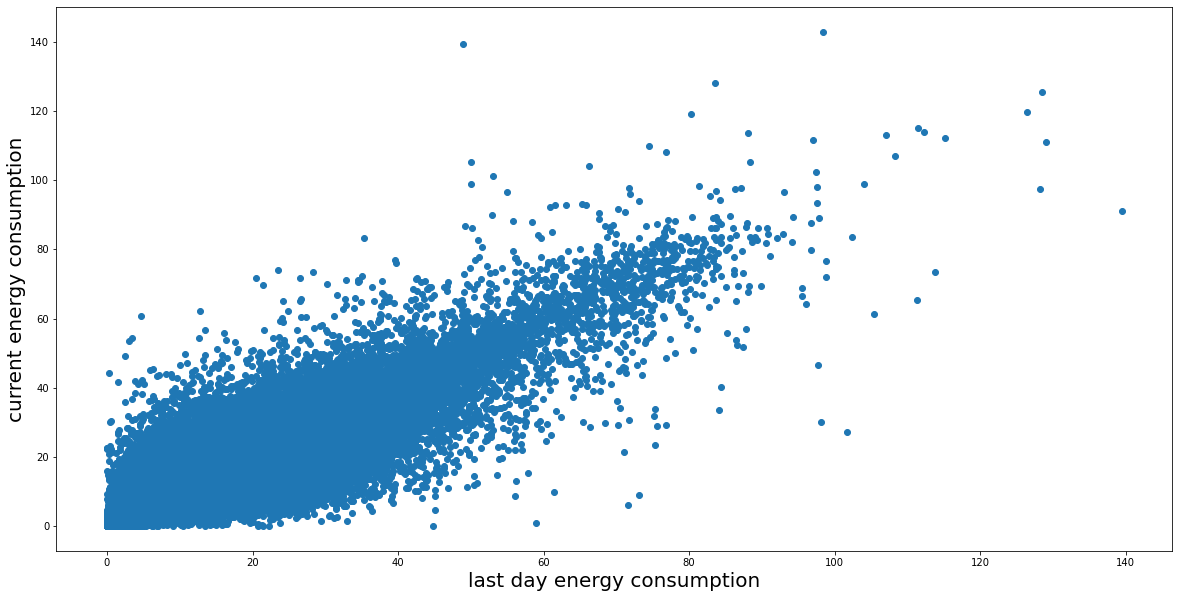

In [40]:
plt.figure(figsize=(20,10))
last_day_con = features_op_clean[:, 10]
current_con = features_op_clean[:, 11]
plt.xlabel("last day energy consumption", fontsize = 20)
plt.ylabel("current energy consumption", fontsize = 20)
plt.scatter(last_day_con,current_con)


In [41]:
features_clean = features_op_clean[:, 0:11]

#current_con = features_op_clean[:, 11]
features_clean.shape

(512140, 11)

In [42]:
print(features_clean[:, 10])
print(current_con)


[ 3.517  3.237  4.471 ... 14.036 15.111 17.397]
[ 2.933  4.471  3.741 ... 15.99  16.506 15.237]


In [81]:
from sklearn.model_selection import train_test_split
#splitting data into a training and test set (70%-30%).
X_train, X_test, y_train, y_test = train_test_split(
    features_all , En_con.reshape(-1,1), test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(358877, 11) (358877, 1)
(153805, 11) (153805, 1)


In [82]:
import tensorflow as tf

In [83]:
# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_dim=11, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3072      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 134,913
Trainable params: 134,913
Non-trainable params: 0
_________________________________________________________________
None


In [84]:

#Normalizing data:
from sklearn.preprocessing import MinMaxScaler
# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
features_all_norm = scaler.fit_transform(features_all)
En_con_norm = scaler.fit_transform(En_con.reshape(-1,1))
from sklearn.model_selection import train_test_split
#splitting data into a training and test set (70%-30%).
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    features_all_norm , En_con_norm.reshape(-1,1), test_size=0.3, random_state=0)


In [85]:
# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_dim=11, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               3072      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 134,913
Trainable params: 134,913
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train_norm, y_train_norm,
                    validation_data=(X_test_norm, y_test_norm), epochs=100)

Start training
Train on 358877 samples, validate on 153805 samples
Epoch 1/100
358877/358877 [==============================] - 53s 147us/sample - loss: 6.1353e-04 - mean_squared_error: 6.1353e-04 - val_loss: 7.1527e-04 - val_mean_squared_error: 7.1527e-04
Epoch 2/100
358877/358877 [==============================] - 52s 145us/sample - loss: 5.7106e-04 - mean_squared_error: 5.7106e-04 - val_loss: 5.4947e-04 - val_mean_squared_error: 5.4947e-04
Epoch 3/100
358877/358877 [==============================] - 52s 146us/sample - loss: 5.6298e-04 - mean_squared_error: 5.6298e-04 - val_loss: 5.6506e-04 - val_mean_squared_error: 5.6506e-04
Epoch 4/100
358877/358877 [==============================] - 52s 145us/sample - loss: 5.5857e-04 - mean_squared_error: 5.5857e-04 - val_loss: 5.9063e-04 - val_mean_squared_error: 5.9063e-04
Epoch 5/100
358877/358877 [==============================] - 52s 145us/sample - loss: 5.5764e-04 - mean_squared_error: 5.5764e-04 - val_loss: 5.9952e-04 - val_mean_squared_e

Epoch 86/100
358877/358877 [==============================] - 48s 134us/sample - loss: 5.4362e-04 - mean_squared_error: 5.4362e-04 - val_loss: 5.4731e-04 - val_mean_squared_error: 5.4731e-04
Epoch 87/100
358877/358877 [==============================] - 48s 134us/sample - loss: 5.4331e-04 - mean_squared_error: 5.4331e-04 - val_loss: 5.4155e-04 - val_mean_squared_error: 5.4155e-04
Epoch 88/100
358877/358877 [==============================] - 48s 134us/sample - loss: 5.4358e-04 - mean_squared_error: 5.4358e-04 - val_loss: 5.4140e-04 - val_mean_squared_error: 5.4140e-04
Epoch 89/100
358877/358877 [==============================] - 48s 135us/sample - loss: 5.4422e-04 - mean_squared_error: 5.4422e-04 - val_loss: 5.4446e-04 - val_mean_squared_error: 5.4446e-04
Epoch 90/100
358877/358877 [==============================] - 49s 135us/sample - loss: 5.4313e-04 - mean_squared_error: 5.4313e-04 - val_loss: 5.4092e-04 - val_mean_squared_error: 5.4092e-04
Epoch 91/100
358877/358877 [=================

In [95]:
# evaluate the model
mse_norm = model.evaluate(X_test_norm, y_test_norm)[1]
print(f'MSE: {mse_norm}')

y_pred_norm=model.predict(X_test_norm)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test_norm, y_pred_norm))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test_norm, y_pred_norm))

153805/153805 [==============================] - 10s 63us/sample - loss: 5.4157e-04 - mean_squared_error: 5.4157e-04
MSE: 0.0005415724008344114
Mean squared error: 0.00054157
Coefficient of determination: 0.7906


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


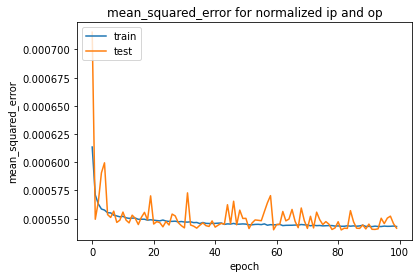

In [96]:
# list all data in history
print(history.history.keys())
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error for normalized ip and op')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [101]:
# More layers and not normalizing output:


#Normalizing data:
from sklearn.preprocessing import MinMaxScaler
# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
features_all_norm = scaler.fit_transform(features_all)
#En_con_norm = scaler.fit_transform(En_con.reshape(-1,1))
from sklearn.model_selection import train_test_split
#splitting data into a training and test set (70%-30%).
X_train_norm_2, X_test_norm_2, y_train_norm_2, y_test_norm_2 = train_test_split(
    features_all_norm , En_con.reshape(-1,1), test_size=0.3, random_state=0)

# construct the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_dim=11, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model_2.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               3072      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 200,705
Trainable params: 200,705
Non-trainable params: 0
_________________________________________________________________
None


In [102]:
model_2.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model_2.fit(X_train_norm_2, y_train_norm_2,
                    validation_data=(X_test_norm_2, y_test_norm_2), epochs=100)

Start training
Train on 358877 samples, validate on 153805 samples
Epoch 1/100
358877/358877 [==============================] - 68s 190us/sample - loss: 12.5997 - mean_squared_error: 12.5997 - val_loss: 11.3151 - val_mean_squared_error: 11.3151
Epoch 2/100
358877/358877 [==============================] - 67s 186us/sample - loss: 11.6444 - mean_squared_error: 11.6444 - val_loss: 11.3416 - val_mean_squared_error: 11.3416
Epoch 3/100
358877/358877 [==============================] - 64s 179us/sample - loss: 11.5158 - mean_squared_error: 11.5158 - val_loss: 12.5390 - val_mean_squared_error: 12.5390
Epoch 4/100
358877/358877 [==============================] - 65s 181us/sample - loss: 11.4142 - mean_squared_error: 11.4142 - val_loss: 11.4429 - val_mean_squared_error: 11.4429
Epoch 5/100
358877/358877 [==============================] - 64s 180us/sample - loss: 11.3796 - mean_squared_error: 11.3795 - val_loss: 11.3737 - val_mean_squared_error: 11.3737
Epoch 6/100
358877/358877 [================

KeyboardInterrupt: 

In [151]:
#Training after cleaning the data i.e. removing rows where NaN appeared:
#adding two more hidden layers
#Normalizing data:
from sklearn.preprocessing import MinMaxScaler
# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
features_clean_norm = scaler.fit_transform(features_clean)
current_con_norm = scaler.fit_transform(current_con.reshape(-1,1))
from sklearn.model_selection import train_test_split
#splitting data into a training and test set (70%-30%).
X_train_norm_clean, X_test_norm_clean, y_train_norm_clean, y_test_norm_clean = train_test_split(
    features_clean_norm , current_con_norm.reshape(-1,1), test_size=0.3, random_state=0)


# construct the model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_dim=11, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model_3.summary())


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               3072      
_________________________________________________________________
dense_35 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_36 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_38 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 257       
Total params: 266,497
Trainable params: 266,497
Non-trainable params: 0
________________________________________________

In [152]:
model_3.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model_3.fit(X_train_norm_clean, y_train_norm_clean,
                    validation_data=(X_test_norm_clean, y_test_norm_clean), epochs=100)

Start training
Train on 358498 samples, validate on 153642 samples
Epoch 1/100
358498/358498 [==============================] - 78s 218us/sample - loss: 6.2865e-04 - mean_squared_error: 6.2865e-04 - val_loss: 5.5055e-04 - val_mean_squared_error: 5.5055e-04
Epoch 2/100
358498/358498 [==============================] - 77s 215us/sample - loss: 5.7723e-04 - mean_squared_error: 5.7723e-04 - val_loss: 5.5457e-04 - val_mean_squared_error: 5.5457e-04
Epoch 3/100
358498/358498 [==============================] - 79s 221us/sample - loss: 5.6987e-04 - mean_squared_error: 5.6987e-04 - val_loss: 5.4263e-04 - val_mean_squared_error: 5.4263e-04
Epoch 4/100
358498/358498 [==============================] - 80s 222us/sample - loss: 5.6433e-04 - mean_squared_error: 5.6433e-04 - val_loss: 5.8000e-04 - val_mean_squared_error: 5.8000e-04
Epoch 5/100
358498/358498 [==============================] - 81s 227us/sample - loss: 5.6167e-04 - mean_squared_error: 5.6167e-04 - val_loss: 5.4512e-04 - val_mean_squared_e

Epoch 86/100
358498/358498 [==============================] - 85s 237us/sample - loss: 5.4453e-04 - mean_squared_error: 5.4453e-04 - val_loss: 5.3691e-04 - val_mean_squared_error: 5.3691e-04
Epoch 87/100
358498/358498 [==============================] - 81s 225us/sample - loss: 5.4454e-04 - mean_squared_error: 5.4454e-04 - val_loss: 5.3818e-04 - val_mean_squared_error: 5.3818e-04
Epoch 88/100
358498/358498 [==============================] - 81s 225us/sample - loss: 5.4446e-04 - mean_squared_error: 5.4446e-04 - val_loss: 5.4259e-04 - val_mean_squared_error: 5.4259e-04
Epoch 89/100
358498/358498 [==============================] - 83s 232us/sample - loss: 5.4412e-04 - mean_squared_error: 5.4412e-04 - val_loss: 5.4000e-04 - val_mean_squared_error: 5.4000e-04
Epoch 90/100
358498/358498 [==============================] - 80s 224us/sample - loss: 5.4439e-04 - mean_squared_error: 5.4439e-04 - val_loss: 5.9374e-04 - val_mean_squared_error: 5.9374e-04
Epoch 91/100
358498/358498 [=================

In [153]:
# evaluate the model
mse_norm = model_3.evaluate(X_test_norm_clean, y_test_norm_clean)[1]
print(f'MSE: {mse_norm}')

y_pred_norm_clean=model.predict(X_test_norm_clean)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test_norm_clean, y_pred_norm_clean))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test_norm_clean, y_pred_norm_clean))

153642/153642 [==============================] - 13s 88us/sample - loss: 5.3616e-04 - mean_squared_error: 5.3616e-04
MSE: 0.0005361572257243097
Mean squared error: 0.00806675
Coefficient of determination: -2.2018


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


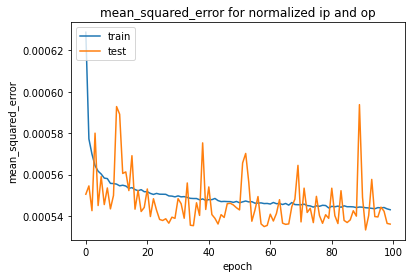

In [154]:
# list all data in history
print(history.history.keys())
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error for normalized ip and op')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The results seem weird.. I will try linear model:

In [163]:
#ordinary linear regression:

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    features_clean , current_con.reshape(-1,1), test_size=0.3, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train_lin,y_train_lin)
#print(linreg.predict(x[:10]))

y_pred_lin = linreg.predict(X_test_lin)

#The coefficients
print('Coefficients: \n', linreg.coef_)
print('Intercept: {}'.format(linreg.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test_lin, y_pred_lin))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test_lin, y_pred_lin)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.3f'
      % r2_score(y_test_lin, y_pred_lin))

Coefficients: 
 [[-2.41606898e-02  1.45943341e-03 -2.07816933e-02  2.76157202e-01
   2.28234244e-04 -1.20730843e-03  3.35230291e-03  6.10165714e-02
   4.73954387e-02  1.26238127e-01  8.81086848e-01]]
Intercept: [0.73096216]
Mean squared error: 11.08936566
RMSE: 3.33006992
Coefficient of determination: 0.784


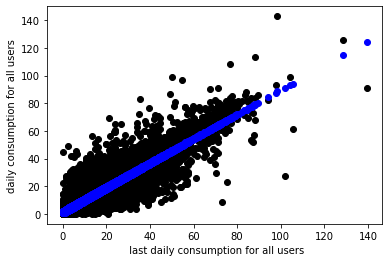

In [179]:
# Plot outputs
plt.scatter(X_test_lin[:, 10], y_test_lin,  color='black')
plt.scatter(X_test_lin[:, 10], y_pred_lin, color='blue', linewidth=1)
plt.xlabel(" last daily consumption for all users")
plt.ylabel("daily consumption for all users")

plt.show()

In [182]:
y_test_poly.shape

(153642, 1)

In [195]:
#Polynomial:

from sklearn.preprocessing import PolynomialFeatures

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    features_clean, current_con.reshape(-1,1), test_size=0.3, random_state=0)



# Fitting Polynomial Regression to the dataset
# source: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
# Create polynomial regression object
polynom_degree = 3

poly_reg = PolynomialFeatures(degree = polynom_degree)

X_poly = poly_reg.fit_transform(X_train_poly) # Fit to data, then transform it to 
    #a new feature matrix consisting ofall polynomial combinations of the features

pol_reg = LinearRegression()

# Train the model using the training sets
pol_reg.fit(X_poly, y_train_poly)

# polyfitting the training data:
poly_vals = pol_reg.predict(poly_reg.fit_transform(X_train_poly))

# Make predictions using the testing set
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(X_test_poly))

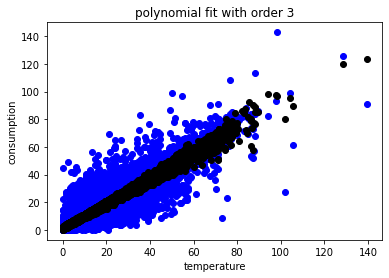

Coefficients: 
 [[-6.80184146e-10 -3.04150163e-01  2.80551646e-01  8.99889843e-03
  -2.42107207e-01  1.11772012e-02  6.07301929e-01  2.18878887e+00
  -2.02883804e-01 -2.56333846e-01  6.42483569e-01  8.82451116e-01
  -1.43297372e-01  1.59039771e-01  1.50729265e-01  2.97423414e-01
  -4.78074825e-03  1.81670712e-02  1.44429982e-02  2.49499433e-01
   9.68099764e-02  1.75717317e-02  9.11138211e-03 -3.72645212e-02
  -9.67106799e-02 -1.67145301e-01  2.54754632e-03 -2.98074815e-02
  -5.03426021e-03 -1.92535486e-01 -3.75750222e-02 -6.58478655e-03
  -5.60785131e-03 -3.05802383e-02 -1.06309848e-01  1.44254554e-03
  -3.79993026e-02 -6.97205921e-02 -5.61488781e-02 -5.93273266e-02
  -8.84495677e-03 -1.43749073e-02  7.07319117e-02 -3.17958213e-03
  -1.10561127e-01 -9.00510381e-01 -3.90993861e-02  3.21034917e-01
  -6.16302094e-02  2.69725646e-02 -1.27355225e-05 -1.50597629e-03
  -4.32191781e-03 -2.24880531e-04 -9.21816239e-04 -4.49015968e-03
   9.81674428e-04  6.07301929e-01 -1.92272413e-15 -3.0615484

In [196]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_test_poly[:, 10], y_test_poly, color='blue')
    plt.scatter(X_test_poly[:, 10], y_pred_poly, color='black')
    plt.xlabel('temperature')
    plt.ylabel('consumption')
    plt.title("polynomial fit with order " +str(polynom_degree))
    plt.show()
    return
viz_polymonial()
# The coefficients
print('Coefficients: \n', pol_reg.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test_poly, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_test_poly, y_pred_poly))

### LSTM RNN: 



In [45]:
# work on a time-series data
df_T_daily

meter_id,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,0x263b7a6969c175823ea1fba2983668fa5f640ab4,0xc8ef570cfdbc48c0555ba48ccb350403cf43cd79,0x077eb7207315025bfd8dd65f5b81f8be612b3229,0xaf8627889fff7ba6fa91bfae6b05636453d032f1,0x3b7466451863d09c34673c4dfe45391d56e0cb23,...,0x5338e0440f7dbcc50f20487fd7a3a675b7508112,0xaec5c63f4e44e21559b0404488ef3ba9884b2745,0xdf6a54b92985398af03423426e744c6d40ee8c69,0x6b6ddc9a73405caab50c8d5575b72288aaa7e844,0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,0xfdaf9f857621ec06f2cf801f42a020a322835090,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,0x47218b46abb2fcaade487a211911406dc6e13730,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd
2017-01-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,33.068,15.035,33.071,3.158,8.166,2.317,14.437,7.824,23.965,11.302
2017-01-02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,36.394,14.989,28.413,3.145,13.519,2.301,16.274,7.517,28.689,14.178
2017-01-03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,33.173,17.267,34.198,3.152,6.778,2.352,7.031,5.398,27.664,15.499
2017-01-04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,33.808,17.712,34.620,3.151,7.476,2.516,17.018,6.788,29.229,11.853
2017-01-05,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,37.332,17.784,37.395,3.180,9.878,2.229,17.603,7.360,29.548,17.431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-12-28,4.503,24.618,17.705,23.993,25.871,17.173,0.427,27.661,8.669,2.781,...,27.911,14.741,19.128,48.016,15.310,10.032,12.906,5.455,31.912,21.011
2017-12-29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-12-30,5.129,15.167,8.966,15.841,46.274,23.460,4.071,10.422,5.830,6.430,...,25.223,16.106,18.483,44.550,12.441,9.757,3.122,5.679,26.313,17.397


In [46]:
df_T_daily.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [47]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


#### Training on one user only as a start.

In [101]:
# dropping columns with 0 (i.e. NaN) values

df.dropna(axis = 0) # apparently, now meter is complete! 

,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,2017-01-01 04:30:00,...,2017-12-31 19:00:00,2017-12-31 19:30:00,2017-12-31 20:00:00,2017-12-31 20:30:00,2017-12-31 21:00:00,2017-12-31 21:30:00,2017-12-31 22:00:00,2017-12-31 22:30:00,2017-12-31 23:00:00,2017-12-31 23:30:00
meter_id,,,,,,,,,,,,,,,,,,,,,


In [ ]:
#Therefore, we use forward fill (filling each NaN with earlier value in columns!):
# We choose a meter with the least number of zeros not to minimize altering the data.
#df = features_pd.fillna(method='ffill')

In [132]:
print("number of nonzeros in dt_T_daily dataframe: ", 
      df_T_daily.astype(bool).sum(axis=0))

print("maxmimum nonzeros value in all users = ", 
      df_T_daily.astype(bool).sum(axis=0).max())

print("user index with maximum nonzero values = ",
      df_T_daily.astype(bool).sum(axis=0).idxmax())

print("sanity check for number of nonzeos in the above user: "
      , df_T_daily["0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e"].astype(bool).sum(axis=0))

number of nonzeros in dt_T_daily dataframe:  meter_id
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7     23
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da     23
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f     23
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407     23
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f     23
                                             ... 
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065    336
0xfdaf9f857621ec06f2cf801f42a020a322835090    315
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18    337
0x47218b46abb2fcaade487a211911406dc6e13730    338
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd    336
Length: 3248, dtype: int64
maxmimum nonzeros value in all users =  361
user index with maximum nonzero values =  0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e
sanity check for number of nonzeos in the above user:  361


In [133]:
#Therefore, we use user "0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e" in our training:

In [153]:
training_set = df_T_daily["0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e"][:255] #70% of the 365 days.
test_set = df_T_daily["0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e"][255:]

In [154]:
training_set.values
test_set.values

array([12.5285, 13.076 , 22.5135, 18.6955, 21.8285, 13.1245, 17.016 ,
       14.113 , 14.462 , 15.374 , 18.735 , 19.6445, 11.3255, 13.4775,
       11.853 , 13.323 , 11.0365, 21.502 , 16.558 , 16.5305, 13.577 ,
       13.294 , 13.0065, 12.2505, 19.862 , 12.748 , 12.552 , 15.1745,
       11.672 , 13.636 , 15.0205, 17.474 , 17.459 , 12.2795, 14.666 ,
       12.3985, 12.6265, 10.476 , 22.274 , 19.744 , 11.201 , 10.219 ,
       12.66  , 14.713 , 14.1165, 12.4545, 17.024 ,  9.6385, 12.8145,
       13.7995, 14.7595, 16.1955, 19.6435, 24.648 , 14.6215, 16.771 ,
       13.055 , 16.564 , 20.732 , 21.641 , 19.114 , 13.2725, 16.3395,
       14.507 , 12.6085, 16.3905, 12.0605, 19.6185, 13.3585, 15.753 ,
       14.365 , 18.252 , 17.7235, 18.6135, 18.8565, 16.4405, 13.672 ,
       14.3675, 14.836 , 18.555 , 15.7555, 19.3825, 13.464 , 12.949 ,
       14.838 , 14.231 , 16.5955, 15.9445, 17.25  , 12.6005, 19.6515,
       12.6735, 15.135 , 16.471 , 21.7105, 22.4485, 14.254 , 14.3645,
       12.317 , 17.0

In [155]:
def fill_zeros_with_last(arr):
    prev = np.arange(len(arr))
    prev[arr == 0] = 0
    prev = np.maximum.accumulate(prev)
    return arr[prev]
# from https://stackoverflow.com/questions/30488961/fill-zero-values-of-1d-numpy-array-with-last-non-zero-values

In [156]:
training_set = fill_zeros_with_last(training_set.values)
test_set = fill_zeros_with_last(test_set.values)

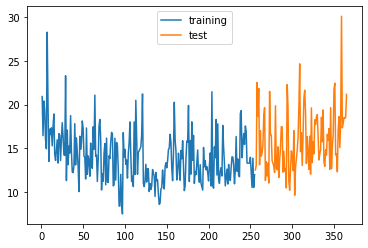

In [167]:
days = np.arange(1, 366, 1)
plt.plot(days [:255], training_set, label = "training")
plt.plot(days[255:], test_set, label = "test")
plt.legend()



In [173]:
#Normalizing data:

training_set

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_set.reshape(-1, 1))


From: https://www.freecodecamp.org/news/the-ultimate-guide-to-recurrent-neural-networks-in-python/

Timesteps: specify how many previous observations should be considered when the recurrent neural network makes a prediction about the current observation.

In [198]:
timesteps = 20 #consider last 20 days.

In [199]:
x_training_data = [] #last 20 days consumption

y_training_data =[] #consumption for the next day. 
# This is the data point that our RNN is trying to predict.


for i in range(timesteps, len(training_data)): #iterate from 20 to last index of training_data

    x_training_data.append(training_data[i-timesteps:i, 0])
    # : Causes loop to append the 40 preceding stock prices to x_training_data
    # with each iteration of the loop.

    y_training_data.append(training_data[i, 0])
    #append the next day’s stock price to y_training_data with each iteration of the loop.


In [200]:
x_training_data = np.array(x_training_data)

y_training_data = np.array(y_training_data)


In [201]:
x_training_data

array([[0.64580572, 0.43077813, 0.62173169, ..., 0.35151939, 0.40769212,
        0.27987565],
       [0.43077813, 0.62173169, 0.5689086 , ..., 0.40769212, 0.27987565,
        0.44191146],
       [0.62173169, 0.5689086 , 0.4105116 , ..., 0.27987565, 0.44191146,
        0.43345302],
       ...,
       [0.42588621, 0.23498084, 0.3024315 , ..., 0.31156469, 0.22852254,
        0.14511892],
       [0.23498084, 0.3024315 , 0.21068993, ..., 0.22852254, 0.14511892,
        0.30688965],
       [0.3024315 , 0.21068993, 0.2046895 , ..., 0.14511892, 0.30688965,
        0.14564908]])

In [202]:
x_training_data.shape

(235, 20)

In [203]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0],
                                               x_training_data.shape[1], 
                                               1))
x_training_data.shape

(235, 20, 1)

In [206]:
x_training_data #now it is in the correct shape.

array([[[0.64580572],
        [0.43077813],
        [0.62173169],
        ...,
        [0.35151939],
        [0.40769212],
        [0.27987565]],

       [[0.43077813],
        [0.62173169],
        [0.5689086 ],
        ...,
        [0.40769212],
        [0.27987565],
        [0.44191146]],

       [[0.62173169],
        [0.5689086 ],
        [0.4105116 ],
        ...,
        [0.27987565],
        [0.44191146],
        [0.43345302]],

       ...,

       [[0.42588621],
        [0.23498084],
        [0.3024315 ],
        ...,
        [0.31156469],
        [0.22852254],
        [0.14511892]],

       [[0.23498084],
        [0.3024315 ],
        [0.21068993],
        ...,
        [0.22852254],
        [0.14511892],
        [0.30688965]],

       [[0.3024315 ],
        [0.21068993],
        [0.2046895 ],
        ...,
        [0.14511892],
        [0.30688965],
        [0.14564908]]])

In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [266]:
rnn = Sequential()
# 1 output
rnn.add(LSTM(units = 100, return_sequences = True, input_shape = (x_training_data.shape[1], 1))) 
#drop 20% of the LSTM layer’s neuron during each iteration of the training stage:
rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 100, return_sequences = True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 100, return_sequences = True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 100)) #last laer
rnn.add(Dropout(0.2))

#desired number of dimensions that the output layer should generate = 1, output layer:
rnn.add(Dense(units = 1))

rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [267]:
print(rnn.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 20, 100)           40800     
_________________________________________________________________
dropout_12 (Dropout)         (None, 20, 100)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 20, 100)           80400     
_________________________________________________________________
dropout_13 (Dropout)         (None, 20, 100)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 20, 100)           80400     
_________________________________________________________________
dropout_14 (Dropout)         (None, 20, 100)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)              

In [268]:
x_training_data.shape

(235, 20, 1)

In [269]:
#training:

rnn.fit(x_training_data, y_training_data, epochs = 10, batch_size = 80)


Train on 235 samples
Epoch 1/10
235/235 [==============================] - 9s 40ms/sample - loss: 0.0665
Epoch 2/10
235/235 [==============================] - 1s 2ms/sample - loss: 0.0223
Epoch 3/10
235/235 [==============================] - 1s 2ms/sample - loss: 0.0189
Epoch 4/10
235/235 [==============================] - 1s 3ms/sample - loss: 0.0212
Epoch 5/10
235/235 [==============================] - 1s 2ms/sample - loss: 0.0181
Epoch 6/10
235/235 [==============================] - 1s 2ms/sample - loss: 0.0197
Epoch 7/10
235/235 [==============================] - 1s 2ms/sample - loss: 0.0177
Epoch 8/10
235/235 [==============================] - 1s 3ms/sample - loss: 0.0183
Epoch 9/10
235/235 [==============================] - 1s 3ms/sample - loss: 0.0174
Epoch 10/10
235/235 [==============================] - 1s 3ms/sample - loss: 0.0172


In [270]:
rnn.fit(x_training_data, y_training_data, epochs = 20, batch_size = 80)


Train on 235 samples
Epoch 1/20
235/235 [==============================] - 1s 2ms/sample - loss: 0.0171
Epoch 2/20
235/235 [==============================] - 1s 3ms/sample - loss: 0.0163
Epoch 3/20
235/235 [==============================] - 1s 2ms/sample - loss: 0.0162
Epoch 4/20
235/235 [==============================] - 1s 3ms/sample - loss: 0.0171
Epoch 5/20
235/235 [==============================] - 1s 3ms/sample - loss: 0.0168
Epoch 6/20
235/235 [==============================] - 1s 3ms/sample - loss: 0.0168
Epoch 7/20
235/235 [==============================] - 1s 2ms/sample - loss: 0.0173
Epoch 8/20
235/235 [==============================] - 1s 3ms/sample - loss: 0.0165
Epoch 9/20
235/235 [==============================] - 1s 2ms/sample - loss: 0.0168
Epoch 10/20
235/235 [==============================] - 1s 3ms/sample - loss: 0.0170
Epoch 11/20
235/235 [==============================] - 1s 3ms/sample - loss: 0.0169
Epoch 12/20
235/235 [==============================] - 1s 3ms/sa

In [271]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 80)


Train on 235 samples
Epoch 1/100
235/235 [==============================] - 1s 2ms/sample - loss: 0.0165
Epoch 2/100
235/235 [==============================] - 1s 2ms/sample - loss: 0.0163
Epoch 3/100
235/235 [==============================] - 1s 2ms/sample - loss: 0.0162
Epoch 4/100
235/235 [==============================] - 1s 3ms/sample - loss: 0.0164
Epoch 5/100
235/235 [==============================] - 1s 2ms/sample - loss: 0.0169
Epoch 6/100
235/235 [==============================] - 1s 2ms/sample - loss: 0.0167
Epoch 7/100
235/235 [==============================] - 1s 2ms/sample - loss: 0.0169
Epoch 8/100
235/235 [==============================] - 1s 2ms/sample - loss: 0.0170
Epoch 9/100
235/235 [==============================] - 1s 2ms/sample - loss: 0.0171
Epoch 10/100
235/235 [==============================] - 1s 2ms/sample - loss: 0.0170
Epoch 11/100
235/235 [==============================] - 1s 2ms/sample - loss: 0.0166
Epoch 12/100
235/235 [==============================]

Epoch 97/100
235/235 [==============================] - 1s 3ms/sample - loss: 0.0161
Epoch 98/100
235/235 [==============================] - 1s 2ms/sample - loss: 0.0158
Epoch 99/100
235/235 [==============================] - 1s 3ms/sample - loss: 0.0158
Epoch 100/100
235/235 [==============================] - 1s 2ms/sample - loss: 0.0161


In [ ]:
# training_set = df_T_daily["0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e"][:255] #70% of the 365 days.
# test_set = df_T_daily["0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e"][255:]

In [274]:
test_data = test_set

In [275]:
all_data = df_T_daily["0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e"].values

In [276]:
len(all_data) - len(test_data)

255

In [277]:
x_test_data = all_data[len(all_data) - len(test_data) - 40:]
x_test_data = np.reshape(x_test_data, (-1, 1))
x_test_data = scaler.transform(x_test_data)


In [278]:
final_x_test_data = []

for i in range(timesteps, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-timesteps:i, 0])

final_x_test_data = np.array(final_x_test_data)


In [279]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], 

                                               final_x_test_data.shape[1], 

                                               1))

In [280]:
predictions = rnn.predict(final_x_test_data)

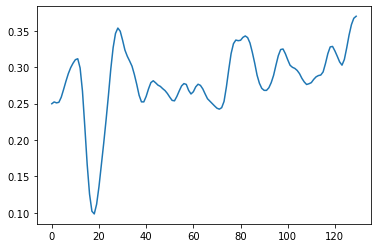

In [281]:
plt.clf()
plt.plot(predictions)

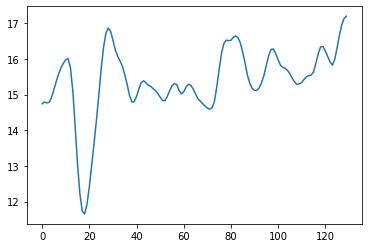

In [282]:
unscaled_predictions = scaler.inverse_transform(predictions)

plt.clf() #This clears the first prediction plot from our canvas

plt.plot(unscaled_predictions)

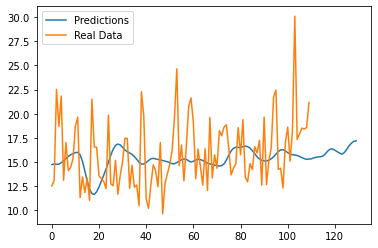

In [283]:
plt.plot(unscaled_predictions, label = "Predictions")

plt.plot(test_data, label = "Real Data")

plt.legend()